In [1002]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [841]:
df = pd.read_csv('heart_disease_uci.csv')


In [842]:
# Column Descriptions:
# id (Unique id for each patient)
# age (Age of the patient in years)
# origin (place of study)
# sex (Male/Female)
# cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
# trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
# chol (serum cholesterol in mg/dl)
# fbs (if fasting blood sugar > 120 mg/dl)
# restecg (resting electrocardiographic results)
# -- Values: [normal, stt abnormality, lv hypertrophy]
# thalach: maximum heart rate achieved
# exang: exercise-induced angina (True/ False)
# oldpeak: ST depression induced by exercise relative to rest
# slope: the slope of the peak exercise ST segment
# ca: number of major vessels (0-3) colored by fluoroscopy
# thal: [normal; fixed defect; reversible defect]
# num: the predicted attribute

In [843]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [844]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [845]:
df.rename(columns={'cp':'chest_pain','trestbps':'restbp', 'num':'hd'}, inplace=True)

In [846]:
df

,id,age,sex,dataset,chest_pain,restbp,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,hd
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [847]:
df.isnull().sum()

id              0
age             0
sex             0
dataset         0
chest_pain      0
restbp         59
chol           30
fbs            90
restecg         2
thalch         55
exang          55
oldpeak        62
slope         309
ca            611
thal          486
hd              0
dtype: int64

In [848]:
df.drop(['id','dataset'],axis=1, inplace=True)

In [850]:
df['hd'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: hd, dtype: int64

In [851]:
#here 0 represent 'no heart disease' and 1 and more than 1 represent different level of heart disesase'
#so we convert more than 1 to 1 to represent 'heart disease'

In [852]:
flt = df['hd']>=1 
df[flt] = df[flt].replace([2,3,4], 1)

In [853]:
df['hd'].value_counts()

1    509
0    411
Name: hd, dtype: int64

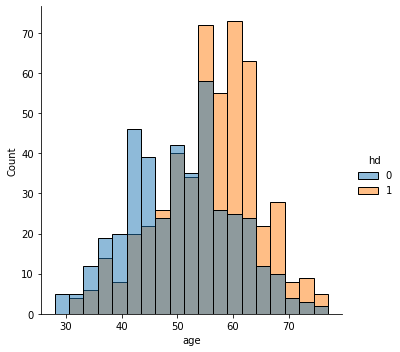

In [854]:
sns.displot(df, x='age', hue='hd')

In [855]:
df['sex'].value_counts()

Male      726
Female    194
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

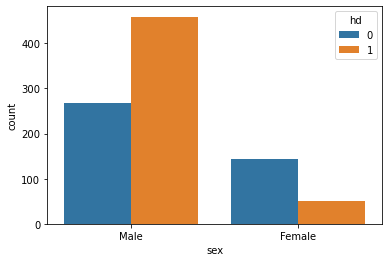

In [856]:
sns.countplot(data=df, x='sex', hue='hd')

In [857]:
df['chest_pain'].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: chest_pain, dtype: int64

In [858]:
#handling null values

In [859]:
df.isnull().mean()*100

age            0.000000
sex            0.000000
chest_pain     0.000000
restbp         6.413043
chol           3.260870
fbs            9.782609
restecg        0.217391
thalch         5.978261
exang          5.978261
oldpeak        6.739130
slope         33.586957
ca            66.413043
thal          52.826087
hd             0.000000
dtype: float64

In [860]:
#check the length of missing values of columns which are less than 10%
flt = (df['restbp'].isnull() | df['chol'].isnull() | df['restecg'].isnull() | 
       df['thalch'].isnull() | df['exang'].isnull() | df['oldpeak'].isnull())
len(df[flt])/len(df)*100

10.326086956521738

In [861]:
# so we can drop these columns as these are around 10% of the whole data
df.dropna(subset=['restbp','chol','restecg','thalch','exang','oldpeak'], inplace=True)

In [862]:
df.isnull().sum()

age             0
sex             0
chest_pain      0
restbp          0
chol            0
fbs            85
restecg         0
thalch          0
exang           0
oldpeak         0
slope         226
ca            517
thal          400
hd              0
dtype: int64

In [863]:
df['fbs'].value_counts()

False    629
True     111
Name: fbs, dtype: int64

<AxesSubplot:xlabel='fbs', ylabel='count'>

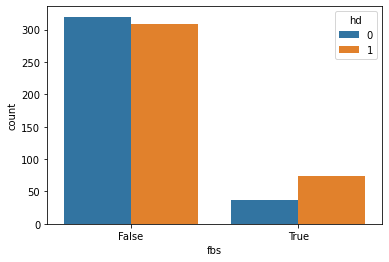

In [864]:
sns.countplot(data=df,x='fbs',hue='hd')

In [865]:
#impute 'fbs' with most_frequent value
mode = df['fbs'].mode()[0]
df['fbs'] = df['fbs'].fillna(mode)

In [866]:
df.isnull().sum()

age             0
sex             0
chest_pain      0
restbp          0
chol            0
fbs             0
restecg         0
thalch          0
exang           0
oldpeak         0
slope         226
ca            517
thal          400
hd              0
dtype: int64

In [867]:
df['slope'].value_counts()

flat           339
upsloping      199
downsloping     61
Name: slope, dtype: int64

<AxesSubplot:xlabel='slope', ylabel='count'>

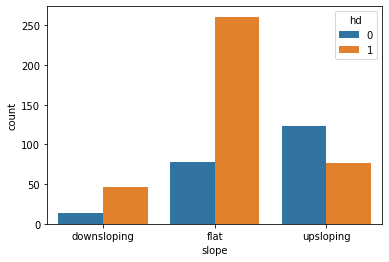

In [868]:
sns.countplot(data=df, x='slope', hue='hd')

In [869]:

#here slope looks correlated with traget column so we can use KNN imputer to impute this value as
#imputing with most frequent may mislead 
#and we can use ordinal encoding for slope : i.e highest value for 'flat' slope , then unslopping, then downsloping 

In [870]:
df['ca'].value_counts()

0.0    180
1.0    117
2.0      8
3.0      3
Name: ca, dtype: int64

<AxesSubplot:xlabel='ca', ylabel='count'>

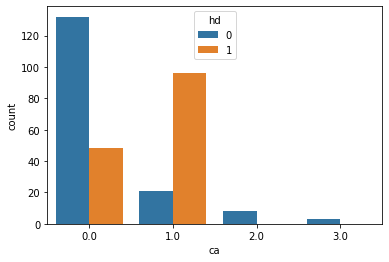

In [871]:
sns.countplot(data=df, x='ca', hue='hd')

In [872]:
#here category 1 has mostly heart disease , so we can use KNN to impute this 

In [873]:
df['thal'].value_counts()

normal               194
reversable defect    187
fixed defect          44
Name: thal, dtype: int64

<AxesSubplot:xlabel='thal', ylabel='count'>

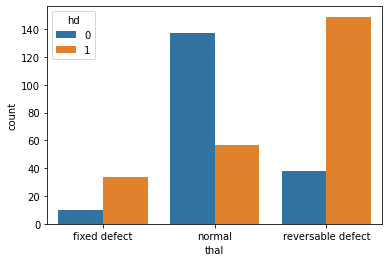

In [874]:
sns.countplot(data=df, x='thal', hue='hd')

<AxesSubplot:xlabel='restecg', ylabel='count'>

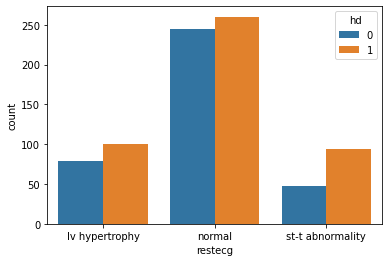

In [875]:
#restecg
sns.countplot(data=df, x='restecg', hue='hd')

In [876]:
#from above graph it is clear that all are almost equally correlated with target column so we can use 
#onehotencoding

<AxesSubplot:xlabel='chest_pain', ylabel='count'>

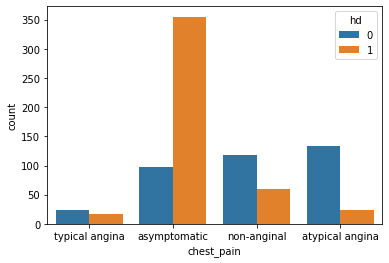

In [877]:
#chest_pain
sns.countplot(data=df, x='chest_pain', hue='hd')

In [878]:
#it is clear from above plot that 'asymptotic chest pain' is highly correlated with heart disease
#so we can use ordinal encoding for chest pain i.e highest value for 'asymptotic chest pain'

In [879]:
# Impute missing values with most frequesnt in slope, ca and thal column
mode_slope = df['slope'].mode()[0]
# mode_slope
df['slope'] = df['slope'].fillna(mode_slope)

In [880]:
mode_ca = df['ca'].mode()[0]
# mode_ca
df['ca'] = df['ca'].fillna(mode_ca)

In [881]:
mode_thal = df['thal'].mode()[0]
# mode_thal
df['thal'] = df['thal'].fillna(mode_thal)

In [882]:
df.isnull().sum()

age           0
sex           0
chest_pain    0
restbp        0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
hd            0
dtype: int64

In [883]:
#categorical values

In [884]:
df['fbs'].value_counts()

False    714
True     111
Name: fbs, dtype: int64

In [885]:
#Column transformer for encoding categorical  columns
#OneHotEncoding for 'sex':2,'fbs':2,'thal':3,'restecg':3
#Ordinal encoding for chest_pain','slope
#so in total there would be 19 columns
# cl1 = ColumnTransformer(transformers=[('lf1',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,5,6,10,12])
#         ('lf2',OrdinalEncoder(categories=[['downsloping','upsloping','flat']]),[10]),
#         ('lf3',OrdinalEncoder(categories=[['atypical angina','non-anginal','typical angina','asymptomatic']]),[2])
#                         ], remainder='passthrough') 


### Here we will use 3 models : DecisionTreeClassifier, RandomForest and GradientBoostingClassifier to predict whether a given person has got heart disease or not wrt given information

In [887]:
X=df.drop('hd',axis=1)
y=df['hd']

In [1000]:
np.sum(y==1)/len(X)

0.5503030303030303

In [888]:
X = pd.get_dummies(X, columns=['sex','chest_pain','fbs','restecg','exang','slope','thal'] , drop_first=True)

In [889]:
X

,age,restbp,chol,thalch,oldpeak,ca,sex_Male,chest_pain_atypical angina,chest_pain_non-anginal,chest_pain_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0.0,1,0,0,1,1,0,0,0,0,0,0,0
1,67,160.0,286.0,108.0,1.5,1.0,1,0,0,0,0,0,0,1,1,0,1,0
2,67,120.0,229.0,129.0,2.6,1.0,1,0,0,0,0,0,0,1,1,0,0,1
3,37,130.0,250.0,187.0,3.5,0.0,1,0,1,0,0,1,0,0,0,0,1,0
4,41,130.0,204.0,172.0,1.4,0.0,0,1,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,62,158.0,170.0,138.0,0.0,0.0,1,0,0,0,0,0,1,1,1,0,1,0
914,46,134.0,310.0,126.0,0.0,0.0,1,0,0,0,0,1,0,0,1,0,1,0
915,54,127.0,333.0,154.0,0.0,0.0,0,0,0,0,1,0,1,0,1,0,1,0
917,55,122.0,223.0,100.0,0.0,0.0,1,0,0,0,1,0,1,0,1,0,0,0


In [890]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [891]:
X_train.shape

(660, 18)

# Decision Tree

In [892]:

dt = DecisionTreeClassifier()

In [893]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [894]:
y_pred = dt.predict(X_test)

In [895]:
accuracy_score(y_test, y_pred)

0.7454545454545455

In [896]:
confusion_matrix(y_test, y_pred)

array([[50, 23],
       [19, 73]])

In [897]:
#pruning decision tree

In [898]:
path = dt.cost_complexity_pruning_path(X_train,y_train)
path

{'ccp_alphas': array([0.        , 0.00132576, 0.00136364, 0.00137741, 0.00137741,
        0.0013843 , 0.00142602, 0.00145688, 0.0014629 , 0.00148485,
        0.00149522, 0.00150086, 0.00151787, 0.00167211, 0.0018038 ,
        0.00181818, 0.0019697 , 0.0020202 , 0.0020202 , 0.0020202 ,
        0.0020202 , 0.00211475, 0.00212121, 0.00215964, 0.00222222,
        0.00227273, 0.00227273, 0.00227273, 0.00242424, 0.00247475,
        0.00249673, 0.0025    , 0.00252525, 0.00252525, 0.00256133,
        0.00262542, 0.00265152, 0.00265152, 0.0026936 , 0.00269792,
        0.00270563, 0.00274411, 0.00287879, 0.00299969, 0.00312468,
        0.00363636, 0.00367007, 0.00371212, 0.00375   , 0.00378788,
        0.00406515, 0.00415045, 0.00426581, 0.00445903, 0.00473747,
        0.00483765, 0.00489802, 0.00498405, 0.00518276, 0.00634457,
        0.0085716 , 0.01742554, 0.03244265, 0.05598984, 0.10358981]),
 'impurities': array([0.        , 0.00265152, 0.00537879, 0.00813361, 0.01088843,
        0.01642562

In [900]:
ccp_alphas = path['ccp_alphas']
len(ccp_alphas)

65

In [901]:
ccp_alphas[:-1]

array([0.        , 0.00132576, 0.00136364, 0.00137741, 0.00137741,
       0.0013843 , 0.00142602, 0.00145688, 0.0014629 , 0.00148485,
       0.00149522, 0.00150086, 0.00151787, 0.00167211, 0.0018038 ,
       0.00181818, 0.0019697 , 0.0020202 , 0.0020202 , 0.0020202 ,
       0.0020202 , 0.00211475, 0.00212121, 0.00215964, 0.00222222,
       0.00227273, 0.00227273, 0.00227273, 0.00242424, 0.00247475,
       0.00249673, 0.0025    , 0.00252525, 0.00252525, 0.00256133,
       0.00262542, 0.00265152, 0.00265152, 0.0026936 , 0.00269792,
       0.00270563, 0.00274411, 0.00287879, 0.00299969, 0.00312468,
       0.00363636, 0.00367007, 0.00371212, 0.00375   , 0.00378788,
       0.00406515, 0.00415045, 0.00426581, 0.00445903, 0.00473747,
       0.00483765, 0.00489802, 0.00498405, 0.00518276, 0.00634457,
       0.0085716 , 0.01742554, 0.03244265, 0.05598984])

In [ ]:
#finding the best value of alpha

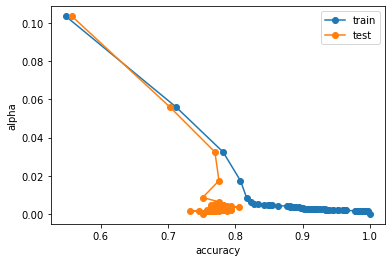

In [910]:
accuracy_train_pred = []
accuracy_test_pred = []
alpha = []

for i in path['ccp_alphas']:
    dt = DecisionTreeClassifier(ccp_alpha=i)
    dt.fit(X_train,y_train)
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)
    alpha.append(i)
    accuracy_train_pred.append(accuracy_score(y_train,train_pred))
    accuracy_test_pred.append(accuracy_score(y_test,test_pred))
    
#plot accuracy score 
plt.plot(accuracy_train_pred, alpha, marker='o', label='train')
plt.plot(accuracy_test_pred, alpha, marker='o', label='test')
plt.xlabel('accuracy')
plt.ylabel('alpha')
plt.legend()
    

In [ ]:
## CV score to find best value of alpha

In [946]:
scores = []
std = []
alpha = []

for i in path['ccp_alphas']:
    dt = DecisionTreeClassifier(ccp_alpha=i)
    dt.fit(X_train,y_train)
    score = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=5)
    scores.append(round(np.sum(score)/5,2))
    std.append(np.std(score))
    alpha.append(i)


In [952]:
alpha_df = pd.DataFrame({'score':scores,
                        'std':std,
                        'alpha':alpha})
# alpha_df

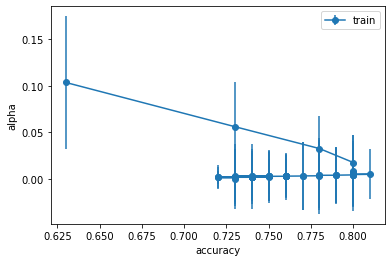

In [954]:
#plot accuracy score 
alpha_df.plot(x='score', y='alpha', marker='o',yerr='std', label='train')
# plt.plot(accuracy_test_pred, alpha, marker='o', label='test')
plt.xlabel('accuracy')
plt.ylabel('alpha')
plt.legend()

In [ ]:
#from above both the graphs it seems alpha = 0.02 is a good value

In [967]:
#parameters for DT  
param_dt = {'criterion':['gini','entropy'],
    'max_depth':[None,3,4,5],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,2],
    'max_features':[None,2,],
    'random_state':[42],
    'max_leaf_nodes':[None,2]}

In [968]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [969]:
#tune parameters of Decision tree

gd = GridSearchCV(estimator=dt, param_grid=param_dt)

In [970]:
gd.fit(X_train_final, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 4, 5],
                         'max_features': [None, 2], 'max_leaf_nodes': [None, 2],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 5], 'random_state': [42]})

In [971]:
y_pred = gd.predict(X_test_final)

In [972]:
accuracy_score(y_test,y_pred)

0.7878787878787878

In [973]:
gd.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42}

In [977]:
#making final tree
dt = DecisionTreeClassifier(criterion='gini',
 max_depth= 4,
 max_features=2,
 max_leaf_nodes= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 ccp_alpha=0.02,                         
 random_state= 42)

In [978]:
dt.fit(X_train_final,y_train)

DecisionTreeClassifier(ccp_alpha=0.02, max_depth=4, max_features=2,
                       random_state=42)

In [979]:
accuracy_score(y_test,y_pred)

0.7878787878787878

In [980]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77        73
           1       0.82      0.79      0.81        92

    accuracy                           0.79       165
   macro avg       0.79      0.79      0.79       165
weighted avg       0.79      0.79      0.79       165



# Random Forest Classifier

In [981]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [982]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8121212121212121

In [983]:
rf.feature_importances_

array([0.09566129, 0.08787588, 0.13907308, 0.14107031, 0.10455948,
       0.02685016, 0.05186403, 0.0739513 , 0.04125258, 0.01526735,
       0.01284371, 0.01762288, 0.01436475, 0.09195257, 0.01370086,
       0.01762803, 0.03125612, 0.02320561])

In [984]:
#tune parameters for RandomForest
param_rf = { 'n_estimators':[50,100],
    'criterion':['gini'],
    'max_depth':[None,2,3,5],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2],
    'max_features':['auto','sqrt'],
    'bootstrap':[True],
    'random_state':[42],
    'max_samples':[None,.50,.75],
    'ccp_alpha':[0.0,0.1]
           }


In [985]:
gd_rf = GridSearchCV(estimator=rf, param_grid=param_rf)

In [986]:
gd_rf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.0, 0.1],
                         'criterion': ['gini'], 'max_depth': [None, 2, 3, 5],
                         'max_features': ['auto', 'sqrt'],
                         'max_samples': [None, 0.5, 0.75],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100], 'random_state': [42]})

In [987]:
gd_rf.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100,
 'random_state': 42}

In [988]:
y_pred = gd_rf.predict(X_test)

In [989]:
accuracy_score(y_test,y_pred)

0.8181818181818182

In [990]:
#make final Random Forest with best params
rf = RandomForestClassifier(bootstrap= True,
 criterion='gini',
 ccp_alpha= 0.0,
 max_depth= None,
 max_features='auto',
 max_leaf_nodes= None,
 max_samples=None,
 min_samples_leaf=1,
 min_samples_split=4,
 n_estimators=100,
 random_state=42)

In [991]:
rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=4, random_state=42)

In [992]:
y_pred = rf.predict(X_test)

In [993]:
accuracy_score(y_test, y_pred)

0.8181818181818182

In [994]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        73
           1       0.81      0.88      0.84        92

    accuracy                           0.82       165
   macro avg       0.82      0.81      0.81       165
weighted avg       0.82      0.82      0.82       165



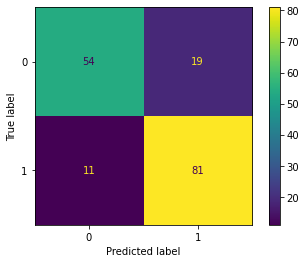

In [995]:
plot_confusion_matrix(rf,X_test,y_test)

## GradientBoostingClassifier

In [717]:
from sklearn.ensemble import GradientBoostingClassifier

In [718]:
gbs = GradientBoostingClassifier()

In [720]:
gbs.fit(X_train, y_train)

GradientBoostingClassifier()

In [721]:
gbs.predict(X_test)

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [722]:
accuracy_score(y_test, y_pred)

0.7757575757575758

In [729]:
param_grid = {
    'learning_rate':[0.1,0.2],
    'n_estimators':[50,100],
    'max_depth':[3,4,5],
    'max_features':[None,2,3],
    'ccp_alpha':[0.0,0.1]
}

In [730]:
gd = GridSearchCV(estimator=gbs, param_grid=param_grid)

In [731]:
gd.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.1], 'learning_rate': [0.1, 0.2],
                         'max_depth': [3, 4, 5], 'max_features': [None, 2, 3],
                         'n_estimators': [50, 100]})

In [732]:
gd.best_params_

{'ccp_alpha': 0.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 50}

In [733]:
y_pred = gd.predict(X_test)

In [734]:
accuracy_score(y_test, y_pred)

0.8363636363636363

In [735]:
#final GDboost model
gbs = GradientBoostingClassifier(ccp_alpha= 0.0,
 learning_rate= 0.1,
 max_depth= 3,
 max_features= None,
 n_estimators= 50)

In [736]:
gbs.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=50)

In [737]:
y_pred = gbs.predict(X_test)

In [738]:
accuracy_score(y_test, y_pred)

0.8363636363636363

In [739]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        73
           1       0.84      0.88      0.86        92

    accuracy                           0.84       165
   macro avg       0.84      0.83      0.83       165
weighted avg       0.84      0.84      0.84       165



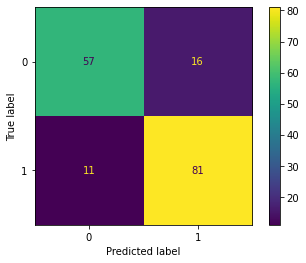

In [743]:
plot_confusion_matrix(gbs,X_test,y_test)